In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dark_horse = cv2.imread("Resources/DATA/horse.jpg")
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread("Resources/DATA/rainbow.jpg")
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread("Resources/DATA/bricks.jpg")
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

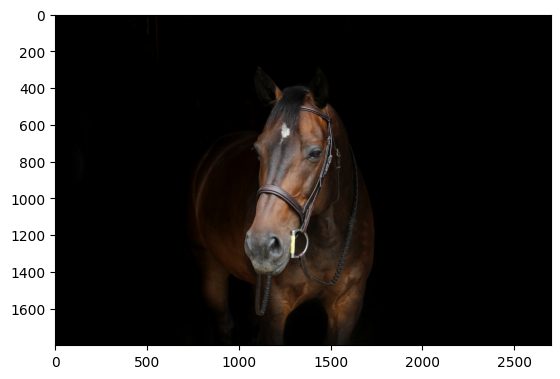

In [7]:
plt.imshow(show_horse)

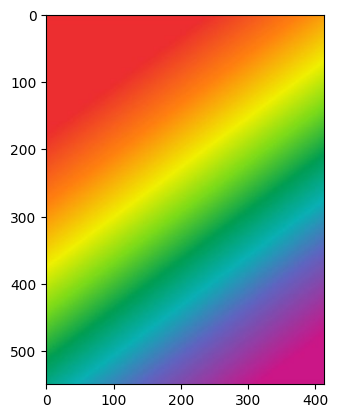

In [8]:
plt.imshow(show_rainbow)

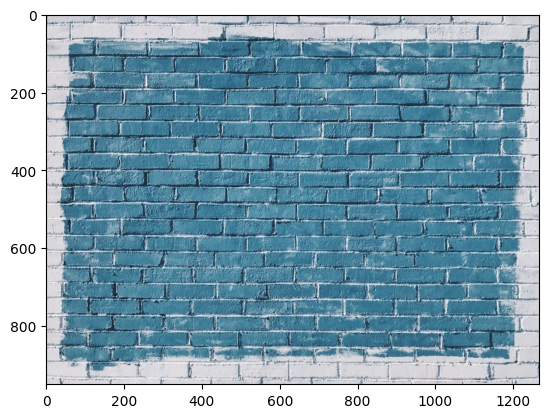

In [10]:
plt.imshow(show_bricks)

In [17]:
# OpenCV by default works on 'BGR' color channel. hence channels=[0] will point to first channel which is 'B'
hist_val_b = cv2.calcHist([blue_bricks], channels=[0], mask=None, histSize=[256], ranges=[0, 256]) 

In [18]:
type(hist_val_b), hist_val_b.shape

(numpy.ndarray, (256, 1))

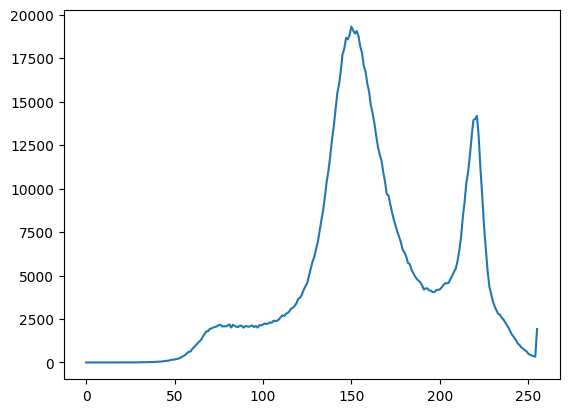

In [19]:
plt.plot(hist_val_b) # Histogram for 'Blue' color

### **Calculating histogram for horse image**

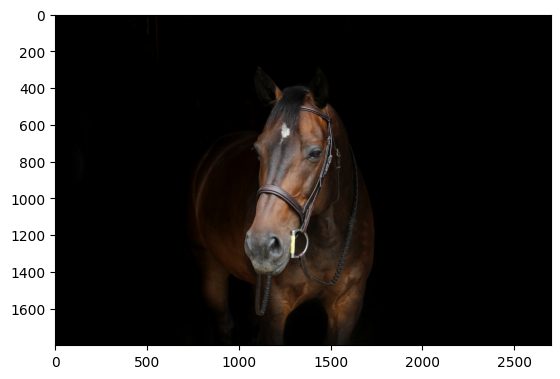

In [20]:
plt.imshow(show_horse)

In [23]:
# The amount of blue color in horse image
hist_horse = cv2.calcHist([dark_horse], channels=[0], mask=None, histSize=[256], ranges=[0, 256]) 

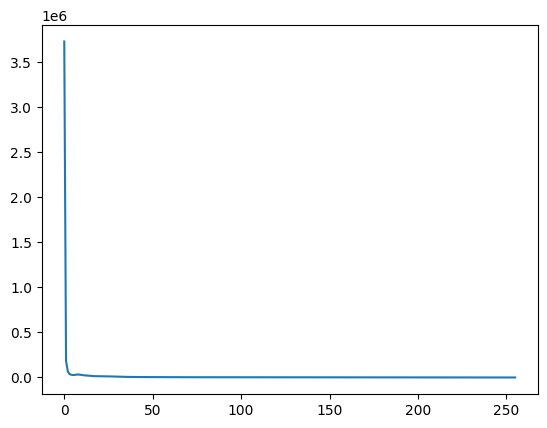

In [24]:
plt.plot(hist_horse)

Text(0.5, 1.0, 'Histogram for blue bricks')

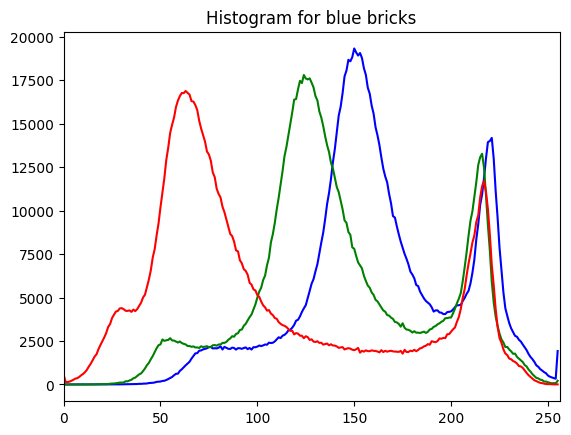

In [25]:
img = blue_bricks
color = ('b', 'g', 'r')
for i, col in enumerate(color): # 'i' [0 : Blue, 1 : Green, 2 : Red]
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])

plt.title("Histogram for blue bricks")

Text(0.5, 1.0, 'Histogram for dark horse')

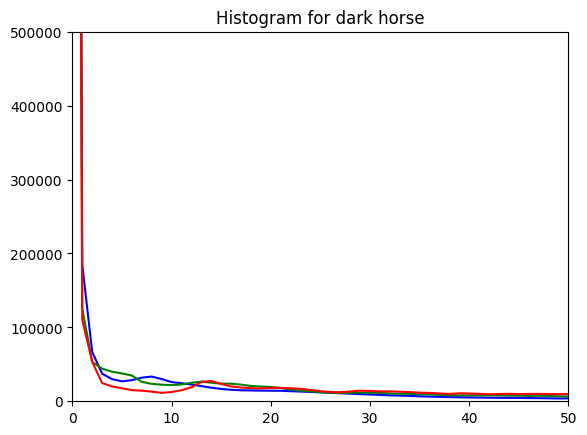

In [29]:
img = dark_horse
color = ('b', 'g', 'r')
for i, col in enumerate(color): # 'i' [0 : Blue, 1 : Green, 2 : Red]
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 50])
    plt.ylim([0, 500000])

plt.title("Histogram for dark horse")

# **Histogram Eqaulization(Contrast)**

![Histogram-equalization](Resources/DATA/hist-equalization-pic.png)

### **Histogram equalization will be goind to `reduce the color depth(Reducing the shades of gray)`**

In [30]:
rainbow = cv2.imread("Resources/DATA/rainbow.jpg")
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

In [32]:
img = rainbow

In [33]:
img.shape

(550, 413, 3)

In [34]:
mask = np.zeros(img.shape[:2], np.uint8)

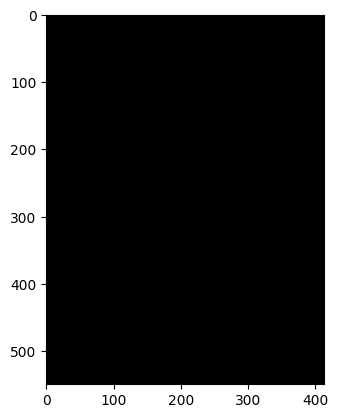

In [35]:
plt.imshow(mask, cmap='gray')

In [36]:
mask[300:400, 100:400] = 255

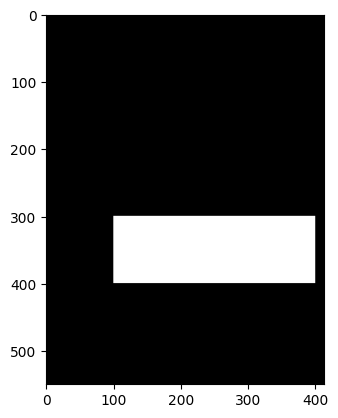

In [37]:
plt.imshow(mask, cmap='gray')

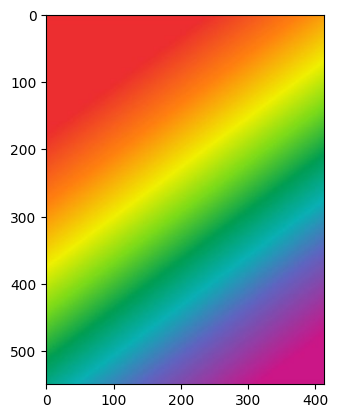

In [38]:
plt.imshow(show_rainbow)

In [39]:
masked_img = cv2.bitwise_and(img, img, mask=mask)

In [41]:
show_masked_img = cv2.bitwise_and(show_rainbow, show_rainbow, mask=mask)

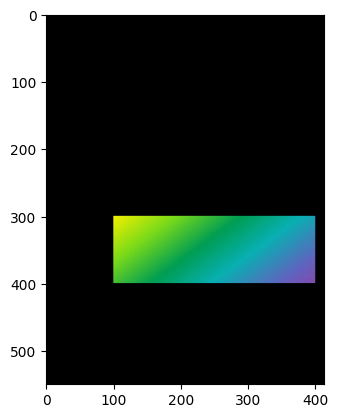

In [42]:
plt.imshow(show_masked_img)

In [43]:
hist_mask_values = cv2.calcHist([rainbow], channels=[2], mask=mask, histSize=[256], ranges=[0, 256])

In [44]:
hist_mask_none = cv2.calcHist([rainbow], channels=[2], mask=None, histSize=[256], ranges=[0, 256])

Text(0.5, 1.0, 'Red histogram for mask rainbow')

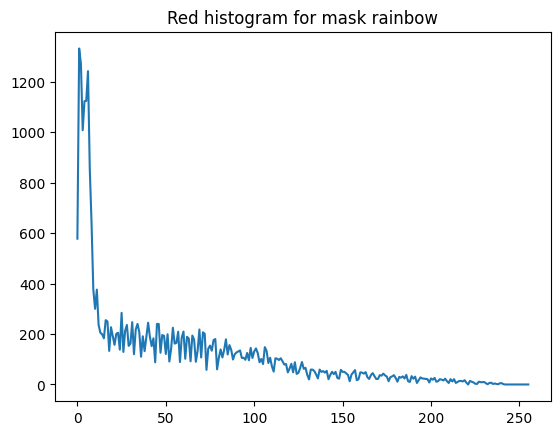

In [45]:
plt.plot(hist_mask_values)
plt.title("Red histogram for mask rainbow")

Text(0.5, 1.0, 'Red histogram for normal rainbow')

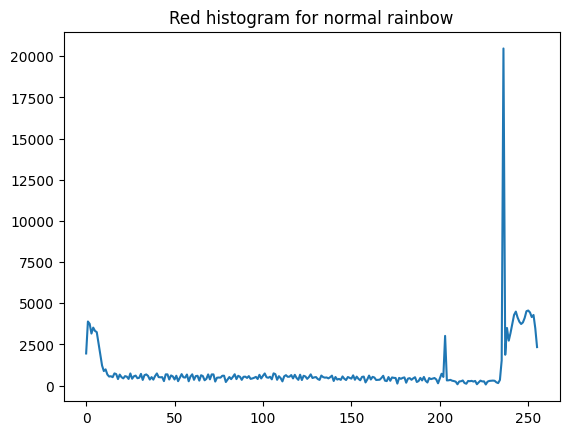

In [46]:
plt.plot(hist_mask_none)
plt.title("Red histogram for normal rainbow")

In [47]:
gorilla = cv2.imread("Resources/DATA/gorilla.jpg", 0)

In [50]:
def display(img):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

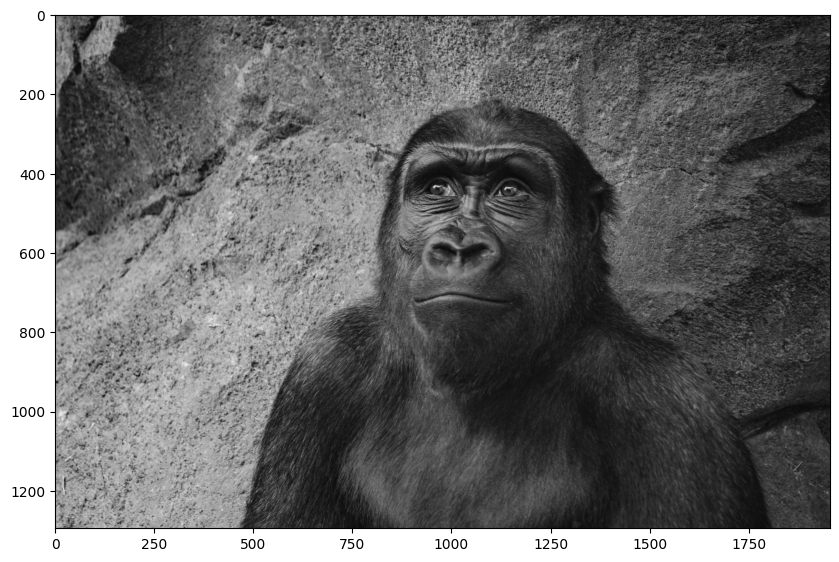

In [51]:
display(gorilla)

In [54]:
hist_val_gray_gorilla = cv2.calcHist([gorilla], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

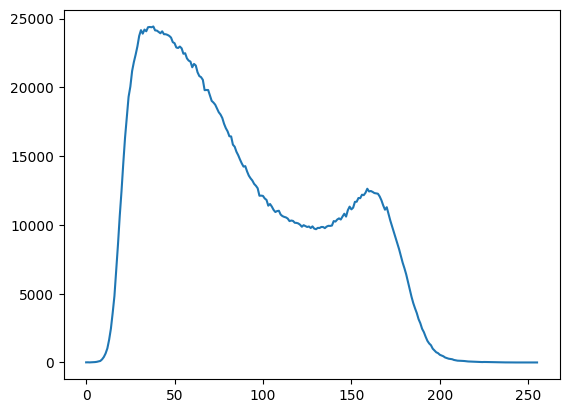

In [55]:
plt.plot(hist_val_gray_gorilla)

In [58]:
eq_gorilla = cv2.equalizeHist(gorilla) # Manipulates contrast

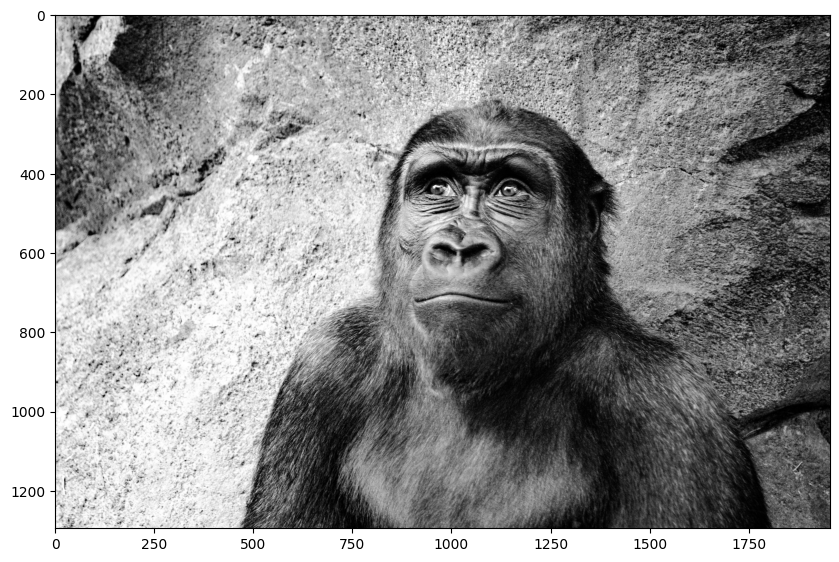

In [59]:
display(eq_gorilla)

In [60]:
hist_val_gorilla = cv2.calcHist([eq_gorilla], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

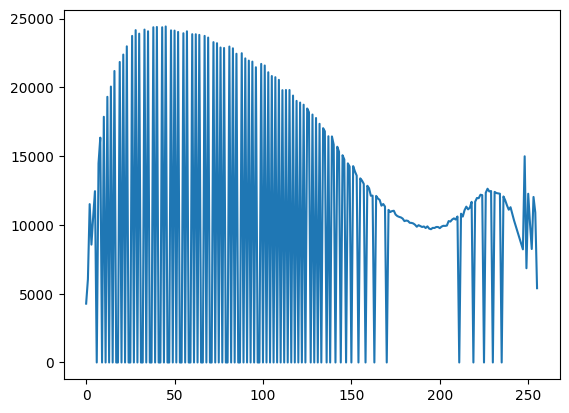

In [61]:
plt.plot(hist_val_gorilla)

In [63]:
color_gorilla = cv2.imread("Resources/DATA/gorilla.jpg")
show_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)

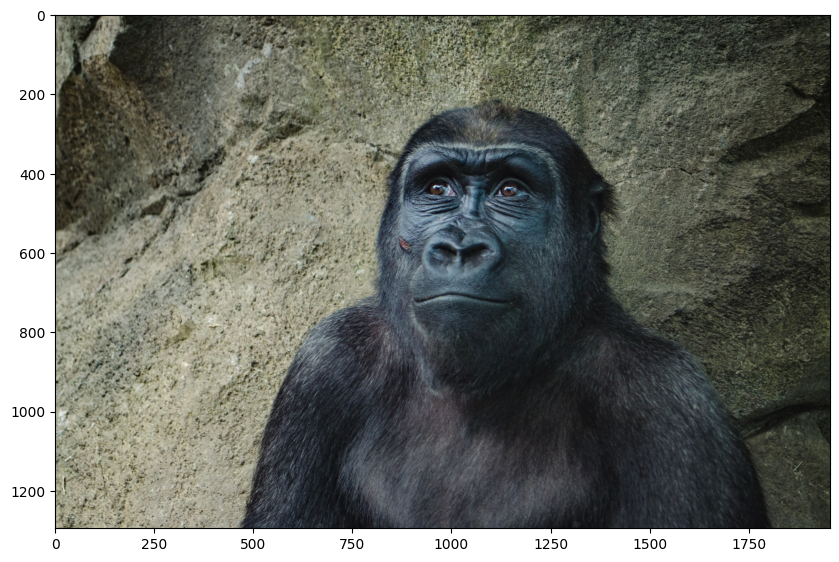

In [65]:
display(show_gorilla)

In [66]:
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)

In [70]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

In [71]:
equalized_version = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

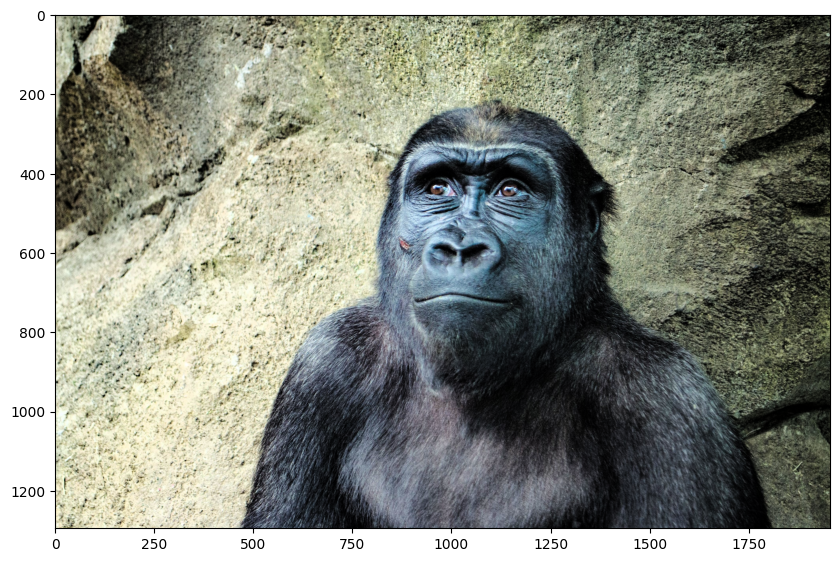

In [72]:
display(equalized_version)